<a href="https://colab.research.google.com/github/suphaporn7041/Data-analyst/blob/main/House_sale_prediction_with_6_Machine_learning_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House sale prediction 

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

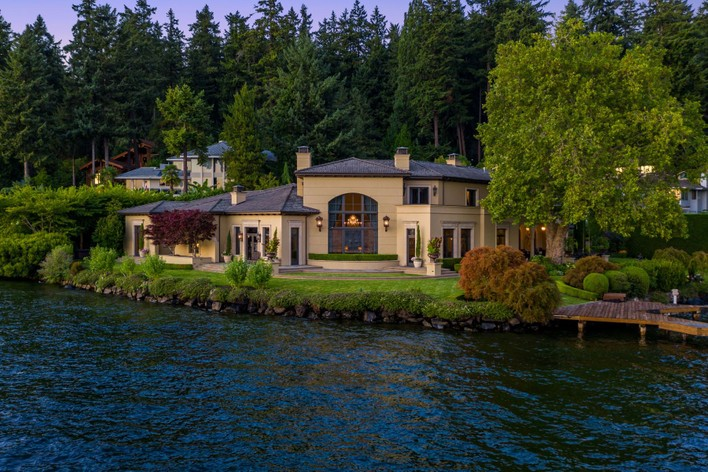

**LIST OF REGRESSION ALGORITHMS IN MACHINE LEARNING**
1.  Linear Regression
2.  Ridge Regression
3.  Lasso Regression 
4.  KNN Model Regression 
5.  Decision Tree Regression 
6.  Random Forest


**Target variable**
*  price

**Features**
*  bedrooms         
*  bathrooms        
*  sqft_living : living area    
*  sqft_lot     
*  floors           
*  waterfront       
*  view             
*  condition        
*  grade            
*  sqft_above       
*  sqft_basement    
*  yr_built : year built
*  yr_renovated : year renovated
*  zipcode          
*  lat : latitude             
*  long : longtitude            
*  sqft_living15    
*  sqft_lot15  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm_notebook
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebook/Kaggle/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.shape

(21613, 21)

In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df['zipcode'].astype('category')

0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21608    98103
21609    98146
21610    98144
21611    98027
21612    98144
Name: zipcode, Length: 21613, dtype: category
Categories (70, int64): [98001, 98002, 98003, 98004, ..., 98178, 98188, 98198, 98199]

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
# numeric_feature 
df_no = df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']]

## Explore data

In [5]:
sns.set_style('darkgrid')

In [ ]:
print('number of zipcode: ', len(df['zipcode'].unique()))
print('zipcode: ',df['zipcode'].unique())

number of zipcode:  70
zipcode:  [98178 98125 98028 98136 98074 98053 98003 98198 98146 98038 98007 98115
 98107 98126 98019 98103 98002 98133 98040 98092 98030 98119 98112 98052
 98027 98117 98058 98001 98056 98166 98023 98070 98148 98105 98042 98008
 98059 98122 98144 98004 98005 98034 98075 98116 98010 98118 98199 98032
 98045 98102 98077 98108 98168 98177 98065 98029 98006 98109 98022 98033
 98155 98024 98011 98031 98106 98072 98188 98014 98055 98039]


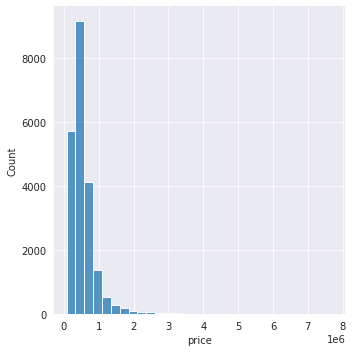

In [ ]:
sns.displot(df_no['price'], bins=30, kind='hist')

**Suspision:** There are any trend??

Let's seeking some trend for first 100 rows of our data.

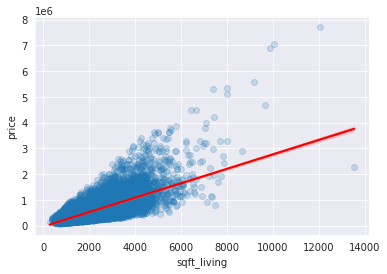

In [ ]:
sns.regplot(data= df, x='sqft_living', y='price' ,scatter_kws={'alpha':0.2}, line_kws={"color": "red"})

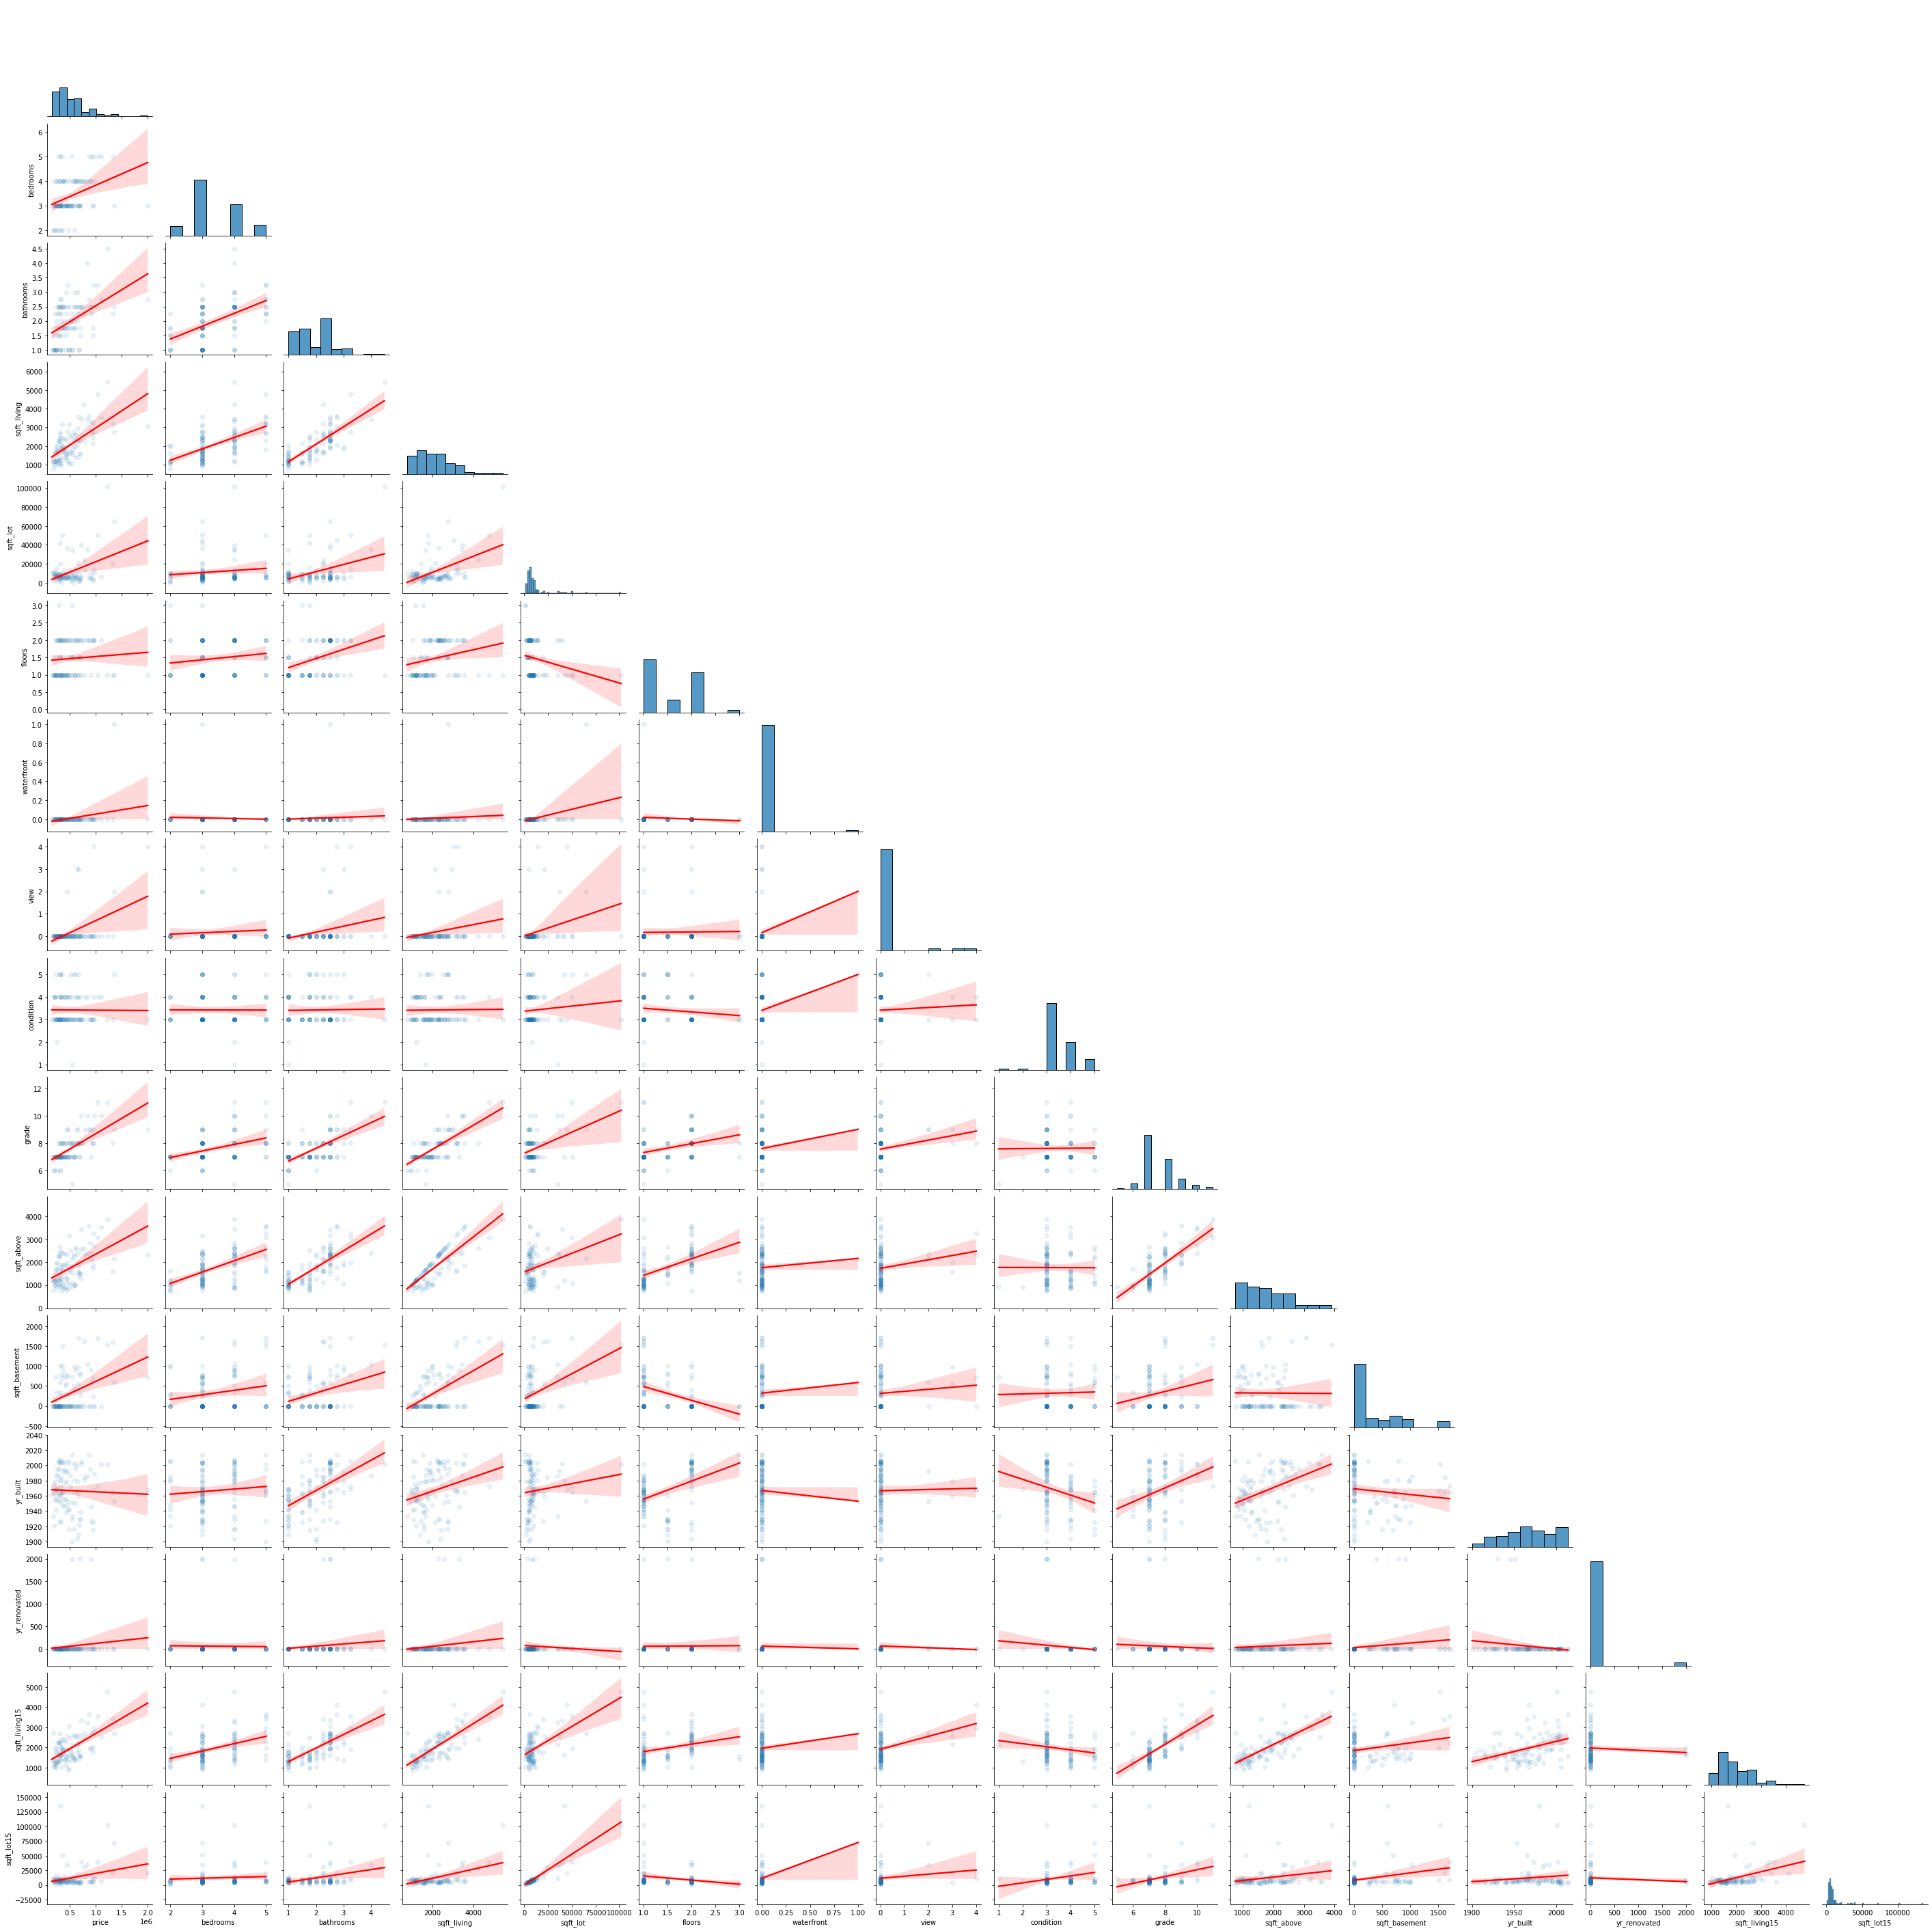

In [ ]:
sns.pairplot(df_no[:100], kind="reg", 
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}}, 
             corner=True)

### Pearson Correlation


**Correlation Coefficient (r)**

Judgement
*  1 Perfect positive correlation
*  0.9 High positive correlation
*  0.5 Low positive correlation
*  -1 Perfect negative correlation
*  -0.9 High negative correlation
*  -0.5 Low negative correlation

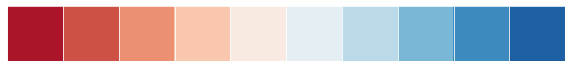

In [ ]:
sns.palplot(sns.color_palette("RdBu", 10))

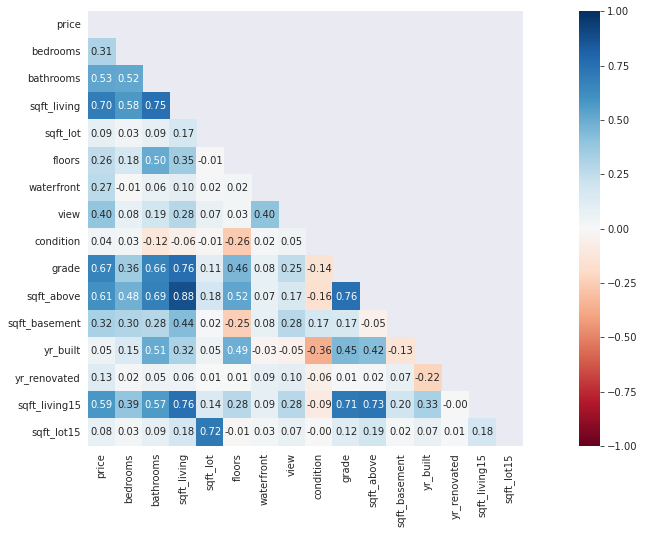

In [ ]:
corr = df_no.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20,8))

sns.heatmap(df_no.corr(), 
            cmap="RdBu", 
            annot=True,
            square=True,
            center=0, 
            fmt=".2f",
            mask=mask,
            vmin=-1, vmax=1)

In [ ]:
df_no.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
Name: price, dtype: float64

To made you see the picture more, made it colorfull!

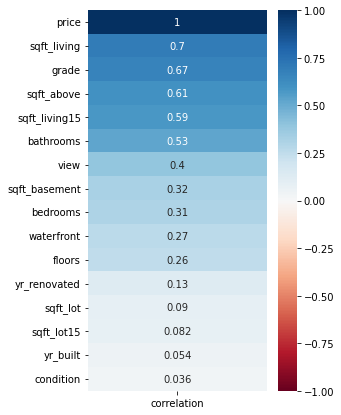

In [ ]:
plt.figure(figsize=(4,7))

sns.heatmap(pd.DataFrame({'correlation':df_no.corr()['price'].sort_values(ascending=False)}), cmap='RdBu', annot=True,
            vmin=-1, vmax=1)

**Conclusion**

So we have rank of correlation feature to price house.

The most is area of living room at 0.7 score, grade at 0.67, area above at 0.61, and area living 15, bathroom by order.


# Machine Learning

**LIST OF REGRESSION ALGORITHMS IN MACHINE LEARNING**
1.  Linear Regression
2.  Ridge Regression
3.  Lasso Regression 
4.  KNN Model Regression 
5.  Decision Tree Regression 
6.  Random Forest


**Create train and test**

In [6]:
X = df_no.drop('price', axis=1)
y = df_no['price']

In [13]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [ ]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [14]:
df_no = df_no[:21610]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 )

In [16]:
print('size of {}: {}'.format('train data', len(X_train)))
print('size of {}: {}'.format('test data', len(X_test)))
print('ratio: {:.2f}'.format(len(X_test)/len(X)))

size of train data: 17290
size of test data: 4323
ratio: 0.20


In [9]:
features = X.columns
features

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

## 1. Linear Regression

**Equation:**

y = b*X + c

‘price’ is the independent variable, whereas ‘xi’ is the dependent variable. When we plot the linear regression, then the slope of the line that provides us the output variables is termed ‘b’, and ‘c’ is its intercept. The linear regression algorithms assume that there is a linear relationship between the input and the output. 

**Import neccesary library and define our function.**

In [10]:
# import neccesary library
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [23]:
# Store the result of model
def adding_result(model, MSE, RMSE, r_sq, cross_val):
  """
    Append value from model to Dataframe result in order to compare with others model
  """
  global result
  model_result = pd.DataFrame([[model, MSE, RMSE, r_sq, cross_val]], columns = ['model', 'MSE', 'RMSE', 'coefficient', 'cross_val'])
  
  result = result.append(model_result, ignore_index=True)
  
  return result


# Cross validation model
from sklearn.model_selection import cross_val_score
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

In [43]:
# import LinearRegression 
from sklearn.linear_model import LinearRegression

# Instantiate Linear Regression model
model = 'Linear Regression'
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)
MSE_lr = MSE(y_train, y_pred)
RMSE_lr = MSE_lr**(1/2)
r_sq_lr = lr.score(X, y) 
cross_val_lr = cross_val(lr)


print(model)
print('MSE: {:.2f} '.format(MSE_lr))
print('RMSE: {:.2f} '.format(RMSE_lr))
print('coefficient of determination:', r_sq_lr)
print('cross-validation score:', cross_val_lr)
print('---------------------------------------')
print('intercept:', lr.intercept_)
print('slope:', lr.coef_)

Linear Regression
MSE: 46203747631.13 
RMSE: 214950.57 
coefficient of determination: 0.6532732217358131
cross-validation score: 0.6473463745651952
---------------------------------------
intercept: 6235837.246414446
slope: [-3.85122162e+04  4.80727113e+04  1.05429092e+02  8.22461573e-02
  2.63667100e+04  5.03893137e+05  4.22851423e+04  2.12931865e+04
  1.20300717e+05  4.95398732e+01  5.58892192e+01 -3.59888221e+03
  9.57117484e+00  3.05359031e+01 -6.11943811e-01]


**Store result**

In [44]:
# result dataframe to keep results from model
result = pd.DataFrame( columns = ['model', 'MSE', 'RMSE', 'coefficient'] )
result

,model,MSE,RMSE,coefficient


In [45]:
adding_result(model, MSE_lr, RMSE_lr, r_sq_lr, cross_val_lr)

,model,MSE,RMSE,coefficient,cross_val
0,Linear Regression,4.620375e+10,214950.570204,0.653273,0.647346


## 2. Ridge Regression

**Equation:**

Y = XB + e

Minimizes the loss encountered in linear regression (discussed above). In place of OLS (Ordinary Least Squares), the output values are predicted by a ridge estimator in ridge regression. The above-discussed linear regression uses OLS to predict the output values. 

The complexity of the ML model can also be reduced via ridge regression. One should note that not all the coefficients are reduced in ridge regression, but it reduces the coefficients to a greater extent as compared to other models. The ridge regression is represented.

**Regularization**

In [29]:
# import Ridge 
import os
from sklearn.linear_model import Ridge
 
# Instantiate Ridge
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
ridge_regressor.fit(X,y)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 5}
0.6468553816153839


In [46]:
# Instantiate Ridge
model = 'Ridge'
ridge = Ridge(alpha=5)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_train)
MSE_rd = MSE(y_train, y_pred)
RMSE_rd = MSE_rd**(1/2)
r_sq_rd = ridge.score(X, y) 
cross_val_rd = cross_val(ridge)


print(model)
print('MSE: {:.2f} '.format(MSE_lr))
print('RMSE: {:.2f} '.format(RMSE_lr))
print('coefficient of determination:', r_sq_lr)
print('cross-validation score:', cross_val_lr)
print('---------------------------------------')
print('intercept:', ridge.intercept_)
print('slope:', ridge.coef_)

Ridge
MSE: 46203747631.13 
RMSE: 214950.57 
coefficient of determination: 0.6532732217358131
cross-validation score: 0.6473463745651952
---------------------------------------
intercept: 6232223.864194902
slope: [-3.85842659e+04  4.80014496e+04  1.05505745e+02  8.11448825e-02
  2.63534249e+04  4.80673989e+05  4.33091963e+04  2.13215024e+04
  1.20196925e+05  4.97086491e+01  5.57969979e+01 -3.59663168e+03
  9.86935799e+00  3.04139338e+01 -6.10771755e-01]


In [47]:
adding_result(model, MSE_rd, RMSE_rd, r_sq_rd, cross_val_rd)

,model,MSE,RMSE,coefficient,cross_val
0,Linear Regression,4.620375e+10,214950.570204,0.653273,0.647346
1,Ridge,4.620697e+10,214958.056536,0.653085,0.647371


Text(0, 0.5, 'Coeficient')

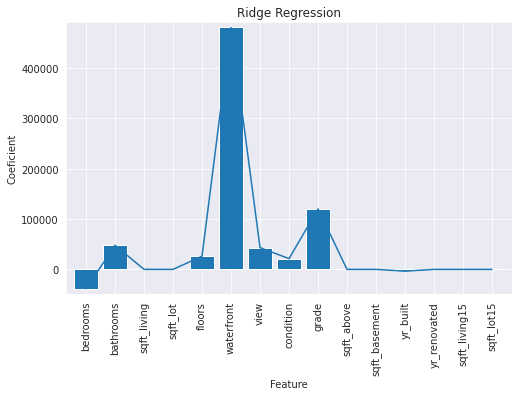

In [48]:
# plot the coefficients
plt.figure(figsize=(8,5))
plt.bar(range(len(features)), ridge.coef_)
plt.plot(range(len(features)), ridge.coef_)
plt.xticks(range(len(features)), features.values, rotation=90) 
plt.margins(0.02)
plt.title('Ridge Regression')
plt.xlabel('Feature')
plt.ylabel('Coeficient')

## 3.  Lasso Regression

A type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of muticollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

**Regularization** 

In [49]:
# import Lasso
from sklearn.linear_model import Lasso

# Instantiate Lasso model 
model = 'Lasso'
lasso = Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

lasso_regressor = GridSearchCV(ridge, parameters, scoring= 'r2', cv=5)
lasso_regressor.fit(X,y)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 5}
0.6468553816153839


In [50]:
# Instantiate lasso regression
model = 'Lasso'
lasso = Lasso(alpha=5)
lasso.fit(X, y)
lasso_coef = lasso.coef_
y_pred = ridge.predict(X_train)
MSE_l = MSE(y_train, y_pred)
RMSE_l = MSE_l**(1/2)
r_sq_l = lasso.score(X, y) 
cross_val_l = cross_val(lasso)


print(model)
print('MSE: {:.2f} '.format(MSE_l))
print('RMSE: {:.2f} '.format(RMSE_l))
print('coefficient of determination:', r_sq_l)
print('cross-validation score:', cross_val_l)
print('---------------------------------------')
print('intercept:', lasso.intercept_)
print('slope:', lasso.coef_)

Lasso
MSE: 46206966069.60 
RMSE: 214958.06 
coefficient of determination: 0.6537317809357628
cross-validation score: 0.6473464483411188
---------------------------------------
intercept: 6194929.225101713
slope: [-3.93002256e+04  4.57241122e+04  2.96720442e+02 -1.64232441e-03
  2.68563223e+04  5.78307619e+05  4.32636756e+04  1.94965197e+04
  1.19714520e+05 -1.35911771e+02 -1.29690309e+02 -3.56990039e+03
  1.01724932e+01  2.48699399e+01 -5.50513812e-01]


In [51]:
adding_result(model, MSE_l, RMSE_l, r_sq_l, cross_val_l)

,model,MSE,RMSE,coefficient,cross_val
0,Linear Regression,4.620375e+10,214950.570204,0.653273,0.647346
1,Ridge,4.620697e+10,214958.056536,0.653085,0.647371
2,Lasso,4.620697e+10,214958.056536,0.653732,0.647346


Text(0, 0.5, 'Coeficient')

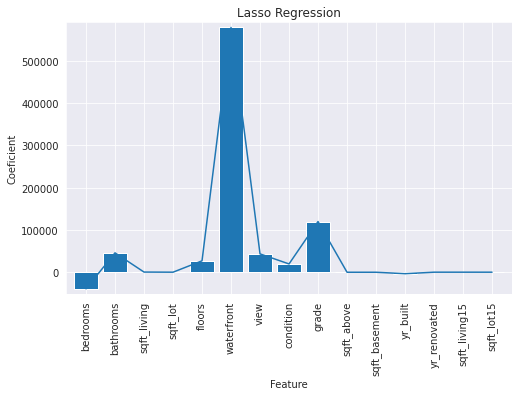

In [52]:
# plot the coefficients
plt.figure(figsize=(8,5))
plt.bar(range(len(features)), lasso.coef_)
plt.plot(range(len(features)), lasso.coef_)
plt.xticks(range(len(features)), features.values, rotation=90) 
plt.margins(0.02)
plt.title('Lasso Regression')
plt.xlabel('Feature')
plt.ylabel('Coeficient')

## 4. KNeighbors Regression

In [53]:
# Import KNeighborsRegressor 
from sklearn.neighbors import KNeighborsRegressor

# Instantiate KNeighborsRegressor 
model = 'K Neighbors'
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

MSE_knn = MSE(y_test, y_pred)
RMSE_knn = MSE_knn**(1/2)
r_sq_knn = knn.score(X, y) 
cross_val_knn = cross_val(knn)


print(model)
print('MSE: {:.2f} '.format(MSE_knn))
print('RMSE: {:.2f} '.format(RMSE_knn))
print('coefficient of determination:', r_sq_knn)
print('cross-validation score:', cross_val_knn)

K Neighbors
MSE: 80683909325.09 
RMSE: 284049.13 
coefficient of determination: 0.7284117556507631
cross-validation score: 0.41236922273749865


In [54]:
adding_result(model, MSE_knn, RMSE_knn, r_sq_knn, cross_val_knn)

,model,MSE,RMSE,coefficient,cross_val
0,Linear Regression,4.620375e+10,214950.570204,0.653273,0.647346
1,Ridge,4.620697e+10,214958.056536,0.653085,0.647371
2,Lasso,4.620697e+10,214958.056536,0.653732,0.647346
3,K Neighbors,8.068391e+10,284049.131886,0.728412,0.412369


## 5. Decision Tree Regression


One of the predictive modelling approaches used in statistics, data mining and machine learning. It uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves).

In [58]:
# import DecisionTreeRegressor 
from sklearn.tree import DecisionTreeRegressor

# Instantiate DecisionTreeRegressor
model = 'Decision Tree'
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

MSE_dt = MSE(y_test, y_pred)
RMSE_dt = MSE_dt**(1/2)
r_sq_dt = dt.score(X, y) 
cross_val_dt = cross_val(dt)


print(model)
print('MSE: {:.2f} '.format(MSE_dt))
print('RMSE: {:.2f} '.format(RMSE_dt))
print('coefficient of determination:', r_sq_dt)
print('cross-validation score:', cross_val_dt)

Decision Tree
MSE: 64259605551.56 
RMSE: 253494.78 
coefficient of determination: 0.9040787469594982
cross-validation score: 0.4905675681270161


Text(0.5, 1.0, 'Features Importances Decision tree')

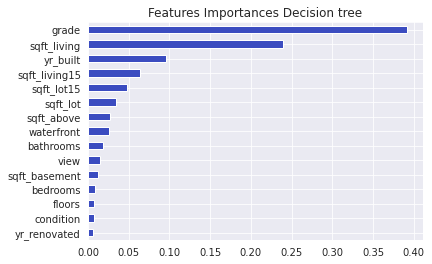

In [59]:
importances = pd.Series(data = dt.feature_importances_, index= X_train.columns)
importances_sorted = importances.sort_values()

importances_sorted.plot(kind = 'barh', cmap="coolwarm")
plt.title('Features Importances Decision tree')

Text(0.5, 1.0, 'Features Importances Decision tree')

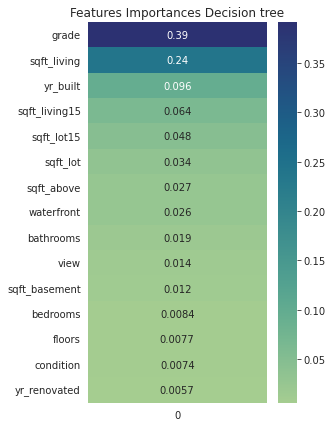

In [60]:
plt.figure(figsize=(4,7))
sns.heatmap(pd.DataFrame(importances_sorted.sort_values(ascending=False)), cmap='crest', annot=True)
plt.title('Features Importances Decision tree')

In [61]:
adding_result(model, MSE_dt, RMSE_dt, r_sq_dt, cross_val_dt)

,model,MSE,RMSE,coefficient,cross_val
0,Linear Regression,4.620375e+10,214950.570204,0.653273,0.647346
1,Ridge,4.620697e+10,214958.056536,0.653085,0.647371
2,Lasso,4.620697e+10,214958.056536,0.653732,0.647346
3,K Neighbors,8.068391e+10,284049.131886,0.728412,0.412369
4,Decision Tree,6.425961e+10,253494.784072,0.904079,0.490568


## 6. Random Forest

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [62]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate Random Forest Regressor
model = 'Random Forest'
rf = RandomForestRegressor(n_estimators=25, random_state=2)    
rf.fit(X_train, y_train) 
y_pred = rf.predict(X_test)

MSE_rf = MSE(y_test, y_pred)
RMSE_rf = MSE_rf**(1/2)
r_sq_rf = rf.score(X, y) 
cross_val_rf = cross_val(rf)


print(model)
print('MSE: {:.2f} '.format(MSE_rf))
print('RMSE: {:.2f} '.format(RMSE_rf))
print('coefficient of determination:', r_sq_rf)
print('cross-validation score:', cross_val_rf)

Random Forest
MSE: 32750020295.00 
RMSE: 180969.67 
coefficient of determination: 0.9161749564198034
cross-validation score: 0.7392965001812932


In [63]:
adding_result(model, MSE_rf, RMSE_rf, r_sq_rf, cross_val_rf)

,model,MSE,RMSE,coefficient,cross_val
0,Linear Regression,4.620375e+10,214950.570204,0.653273,0.647346
1,Ridge,4.620697e+10,214958.056536,0.653085,0.647371
2,Lasso,4.620697e+10,214958.056536,0.653732,0.647346
3,K Neighbors,8.068391e+10,284049.131886,0.728412,0.412369
4,Decision Tree,6.425961e+10,253494.784072,0.904079,0.490568
5,Random Forest,3.275002e+10,180969.666781,0.916175,0.739297


Text(0.5, 1.0, 'Features Importances Random Forest')

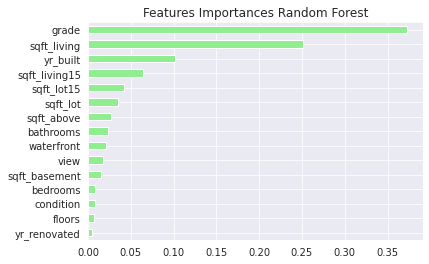

In [64]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)
importances_sorted = importances.sort_values()

importances_sorted.plot(kind = 'barh', color = 'lightgreen')
plt.title('Features Importances Random Forest')

Text(0.5, 1.0, 'Features Importances K Neighbors')

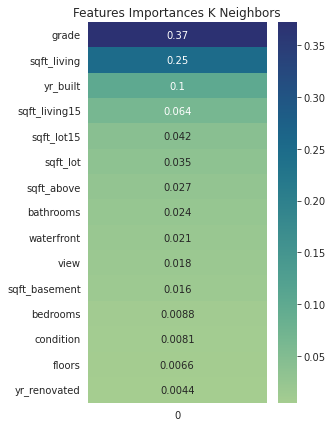

In [65]:
plt.figure(figsize=(4,7))
sns.heatmap(pd.DataFrame(importances_sorted.sort_values(ascending=False)), cmap='crest', annot=True)
plt.title('Features Importances K Neighbors')

# Conclusion

In [66]:
result 

,model,MSE,RMSE,coefficient,cross_val
0,Linear Regression,4.620375e+10,214950.570204,0.653273,0.647346
1,Ridge,4.620697e+10,214958.056536,0.653085,0.647371
2,Lasso,4.620697e+10,214958.056536,0.653732,0.647346
3,K Neighbors,8.068391e+10,284049.131886,0.728412,0.412369
4,Decision Tree,6.425961e+10,253494.784072,0.904079,0.490568
5,Random Forest,3.275002e+10,180969.666781,0.916175,0.739297


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

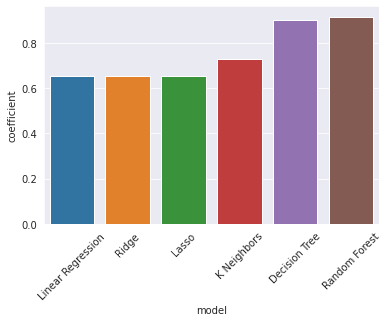

In [69]:
sns.barplot(data = result, x= 'model', y='coefficient')
plt.xticks(rotation=45)

In [71]:
result.sort_values('coefficient', ascending=False)

,model,MSE,RMSE,coefficient,cross_val
5,Random Forest,3.275002e+10,180969.666781,0.916175,0.739297
4,Decision Tree,6.425961e+10,253494.784072,0.904079,0.490568
3,K Neighbors,8.068391e+10,284049.131886,0.728412,0.412369
2,Lasso,4.620697e+10,214958.056536,0.653732,0.647346
0,Linear Regression,4.620375e+10,214950.570204,0.653273,0.647346
1,Ridge,4.620697e+10,214958.056536,0.653085,0.647371


**Conclusion**

The most accurate forecasting model to predict House prices at Kingcounty is **Random Forest** with a coefficient of 0.9167, mean cross validation of 0.739, MSE 3.275e10, RMSE 180969.
